In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

from scipy import stats # needed for ks test

from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp
# specify blue/orange colors for qualitative intervals/data
blue_qual = [blue_cmp.colors[50], blue_cmp.colors[100], blue_cmp.colors[150], blue_cmp.colors[200], blue_cmp.colors[250]]
orange_qual = [orange_cmp.colors[36], orange_cmp.colors[72], orange_cmp.colors[108], orange_cmp.colors[144], orange_cmp.colors[180], orange_cmp.colors[216], orange_cmp.colors[252]]


In [3]:
# load data
# set-up paths
home_dir = '/Volumes/Data/'
# home_dir = "/mnt/labNAS/"


in_path = home_dir+'Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = home_dir+'Emily/figures/fig_2_mapseq/python_out/'


# Load normalized count data - minimum intervention
with open(in_path + 'M194_M220_OMC_separate_all_count.pkl', 'rb') as f:
    omc_count = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_count.pkl', 'rb') as f:
    aca_count = pickle.load(f)

with open(in_path + 'M194_M220_OMC_separate_all_countN.pkl', 'rb') as f:
    omc_countN = pickle.load(f)
    
with open(in_path + 'M194_M220_ACA_separate_all_countN.pkl', 'rb') as f:
    aca_countN = pickle.load(f)

In [5]:
plot_areas = ['AOMCi', 'POMCi','AOMCc', 'POMCc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'HIP', 'AMY', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
omc_countN_cdf, foo = dfs_to_cdf(omc_countN, plot_areas=plot_areas)
omc_countN_cdf

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


,x,cdf,mice,species,dataset,area
0,0.000016,0.000000,MMM1,MMus,M194,AOMCi
1,0.000016,0.000000,MMM1,MMus,M194,AOMCi
2,0.000016,0.000000,MMM1,MMus,M194,AOMCi
3,0.000016,0.000000,MMM1,MMus,M194,AOMCi
4,0.000016,0.000000,MMM1,MMus,M194,AOMCi
...,...,...,...,...,...,...
995,4.756320,0.988235,STM7,STeg,M220,RN
996,4.805947,0.988235,STM7,STeg,M220,RN
997,4.856092,0.988235,STM7,STeg,M220,RN
998,4.906761,0.988235,STM7,STeg,M220,RN


# plot cdfs by species

TypeError: tuple indices must be integers or slices, not str

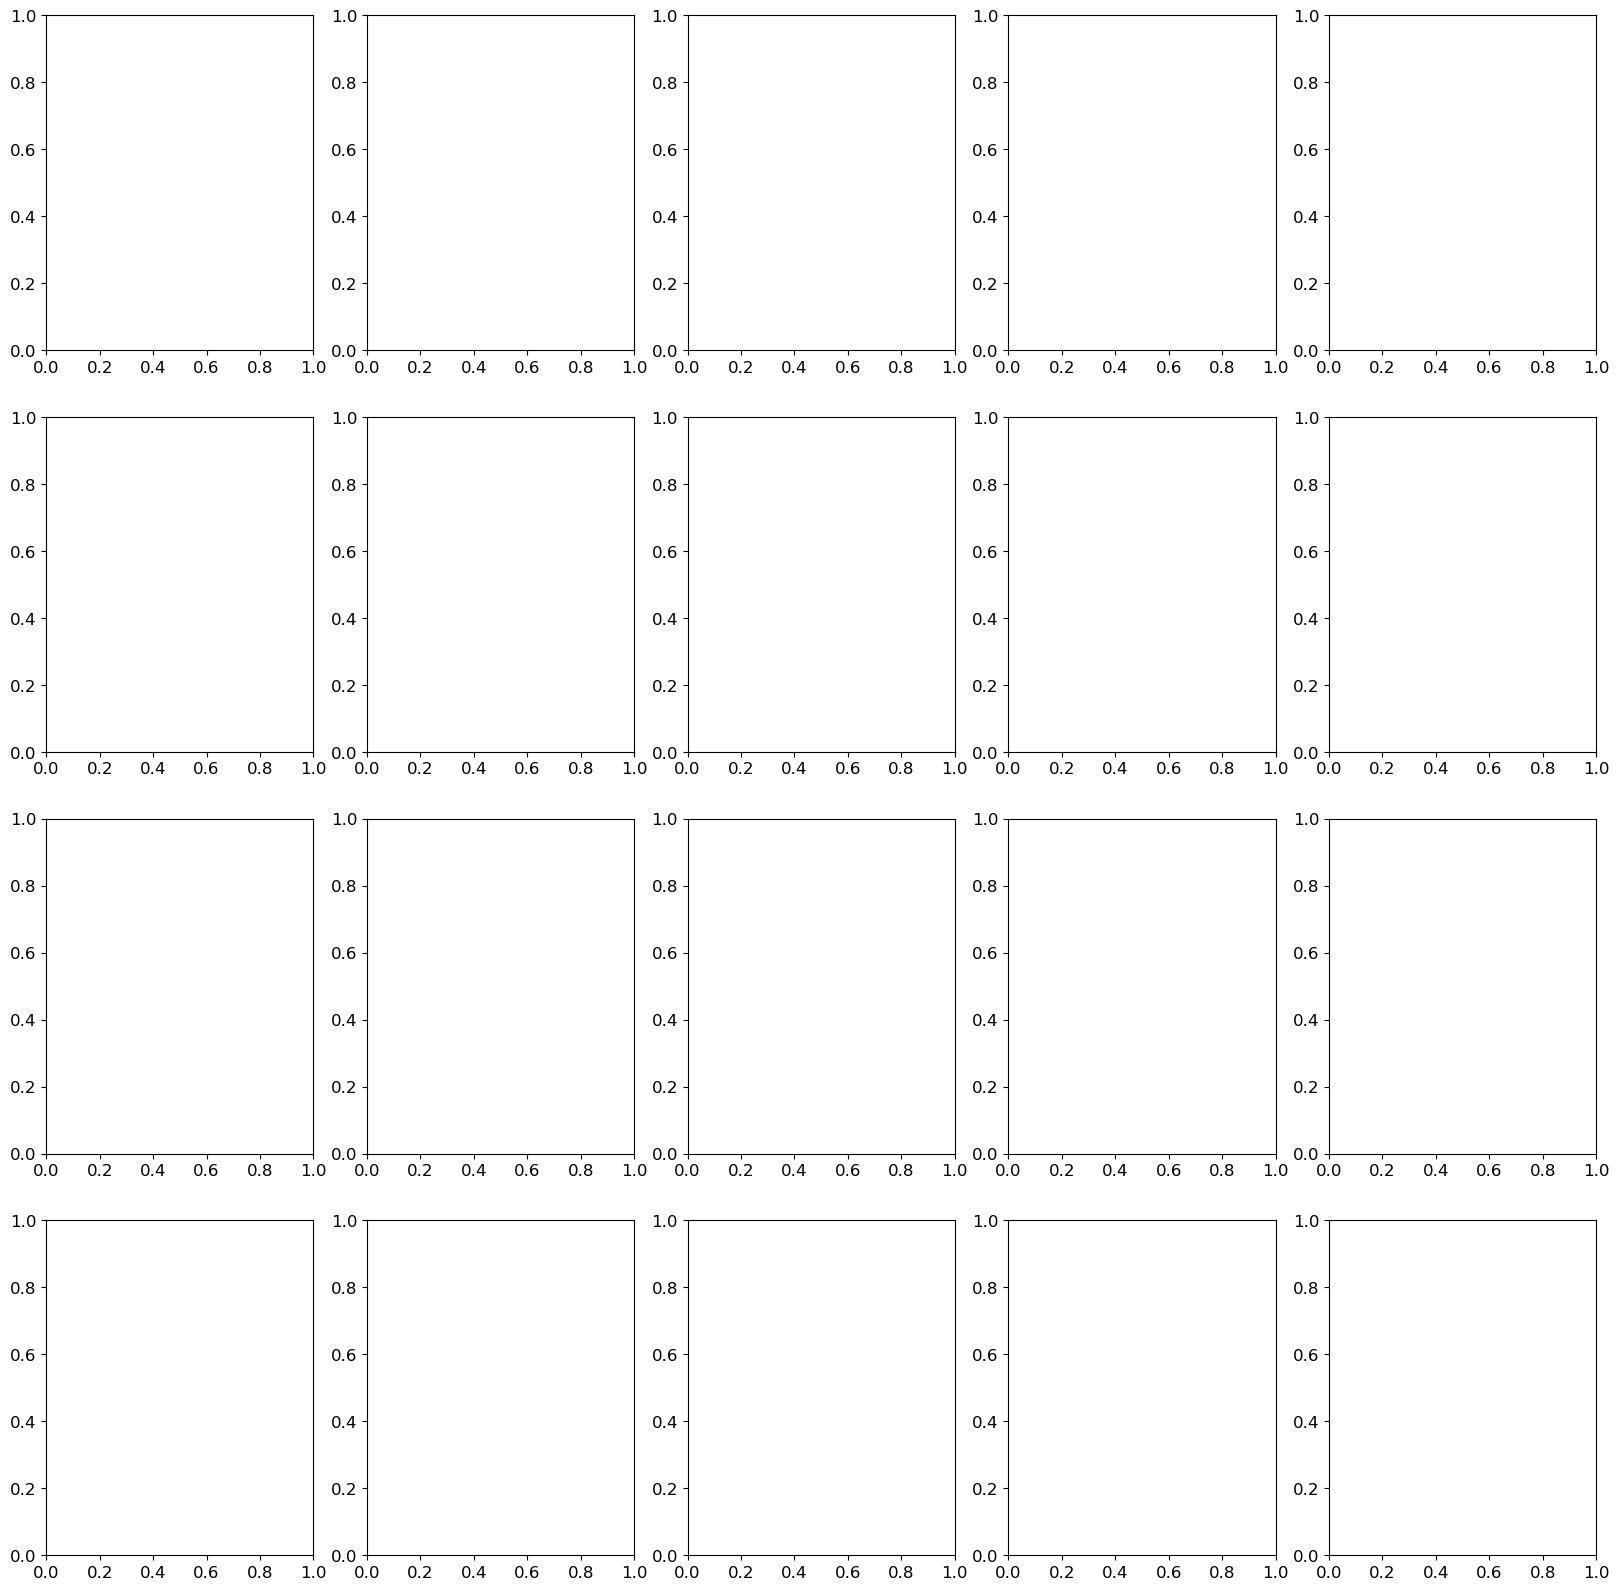

In [111]:
fig, axs = plt.subplots(4,5, figsize=(20,20))

i=0
for ax in axs.flat:
    if i <19:
        area = plot_areas[i]

        plot = omc_countN_cdf[omc_countN_cdf['area']==area]
        
        plot_mm = plot[plot["species"] =="MMus"]
        plot_st = plot[plot["species"] =="STeg"]

        sns.lineplot(plot_mm, x="x", y="cdf", color=blue_cmp.colors[255], ax=ax) # plots mean and ci95 of mice
        sns.lineplot(plot_st, x="x", y="cdf", color=orange_cmp.colors[255], ax=ax) # plots mean and ci95 of mice
        ax.set_xscale("log")
        ax.set_xlabel("Normalized Counts")

        ax.set_title(area)
        i+=1
    else:
        ax.axis('off')

plt.show()

In [ ]:
all_bc = pd.DataFrame(columns=list(omc_countN[0].columns)+["mice", "species", "dataset"])
for i in range(metadata.shape[0]):
    df = omc_countN[i].copy(deep=True)
    df['mice'] = metadata.loc[i, 'mice']
    df['species'] = metadata.loc[i, "species"]
    df['dataset'] = metadata.loc[i, "dataset"]
    all_bc = pd.concat([all_bc, df])

all_bc = all_bc.reset_index(drop=True)
all_bc

,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,APAGv,PPAGd,PPAGv,RN,L1_ctl,H2O_inj_ctl,H2O_targ_ctl,mice,species,dataset
0,0.0,0.000000,0.001950,0.0,0.000000,0.000000,0.000000,0.000000,0.000159,0.001075,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
1,0.0,0.000138,0.003990,0.0,0.002357,0.006801,0.000000,0.000000,0.011118,0.020885,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
2,0.0,0.000020,0.005668,0.0,0.000181,0.000591,0.000000,0.000000,0.000318,0.003071,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
3,0.0,0.000000,0.002539,0.0,0.001813,0.001478,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
4,0.0,0.000000,0.012152,0.0,0.000000,0.000000,0.000000,0.000000,0.005241,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,MMM1,MMus,M194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76813,0.0,0.011628,0.065285,0.0,0.000000,0.000000,0.000000,0.000000,0.030631,0.163399,...,0.380403,0.0,1.591398,0.0,0.0,0.0,0.0,STM7,STeg,M220
76814,0.0,0.283607,0.074197,0.0,0.000000,0.000000,0.000000,0.000000,0.009009,0.021786,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,STM7,STeg,M220
76815,0.0,0.011912,0.084145,0.0,0.000000,0.000000,0.000000,0.000000,0.421622,0.522876,...,0.242075,0.0,0.094086,0.0,0.0,0.0,0.0,STM7,STeg,M220
76816,0.0,0.032331,0.298238,0.0,0.268707,0.842271,0.015038,0.328685,0.018018,0.004357,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,STM7,STeg,M220


In [ ]:
# ks test against distributions b/w species
to_test = ['OB', 'AOMCi', 'POMCi', 'ACAi', 'AOMCc', 'POMCc', 'ACAc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN', 'L1_ctl', 'H2O_inj_ctl', 'H2O_targ_ctl']

ks_result = pd.DataFrame(columns=["area", "ks_stat", "pvalue", "p<0.05?"])

for i in range(len(to_test)):
       area = to_test[i]
       area_df = all_bc.loc[:, [area, "mice", "species", "dataset"]]
       area_idx = area_df[area] > 0
       area_n0 = area_df[area_idx]

       area_mm = area_n0[area_n0['species']=="MMus"]
       area_st = area_n0[area_n0['species']=="STeg"]

       if area_mm.shape[0]==0 or area_st.shape[0]==0:
              row = [area, np.nan, np.nan, np.nan]
       else:
              result = stats.ks_2samp(area_mm.iloc[:,0], area_st.iloc[:,0])
              row = [area, result[0], result[1], result[1]<0.05]

       ks_result.loc[i,:] = row

ks_result

,area,ks_stat,pvalue,p<0.05?
0,OB,0.659498,0.0,True
1,AOMCi,0.366705,0.0,True
2,POMCi,0.206139,0.0,True
3,ACAi,0.301925,0.0,True
4,AOMCc,0.276357,0.0,True
5,POMCc,0.263437,0.0,True
6,ACAc,0.377688,0.0,True
7,AUD,0.409322,0.0,True
8,STRd,0.348145,0.0,True
9,STRv,0.287707,0.0,True


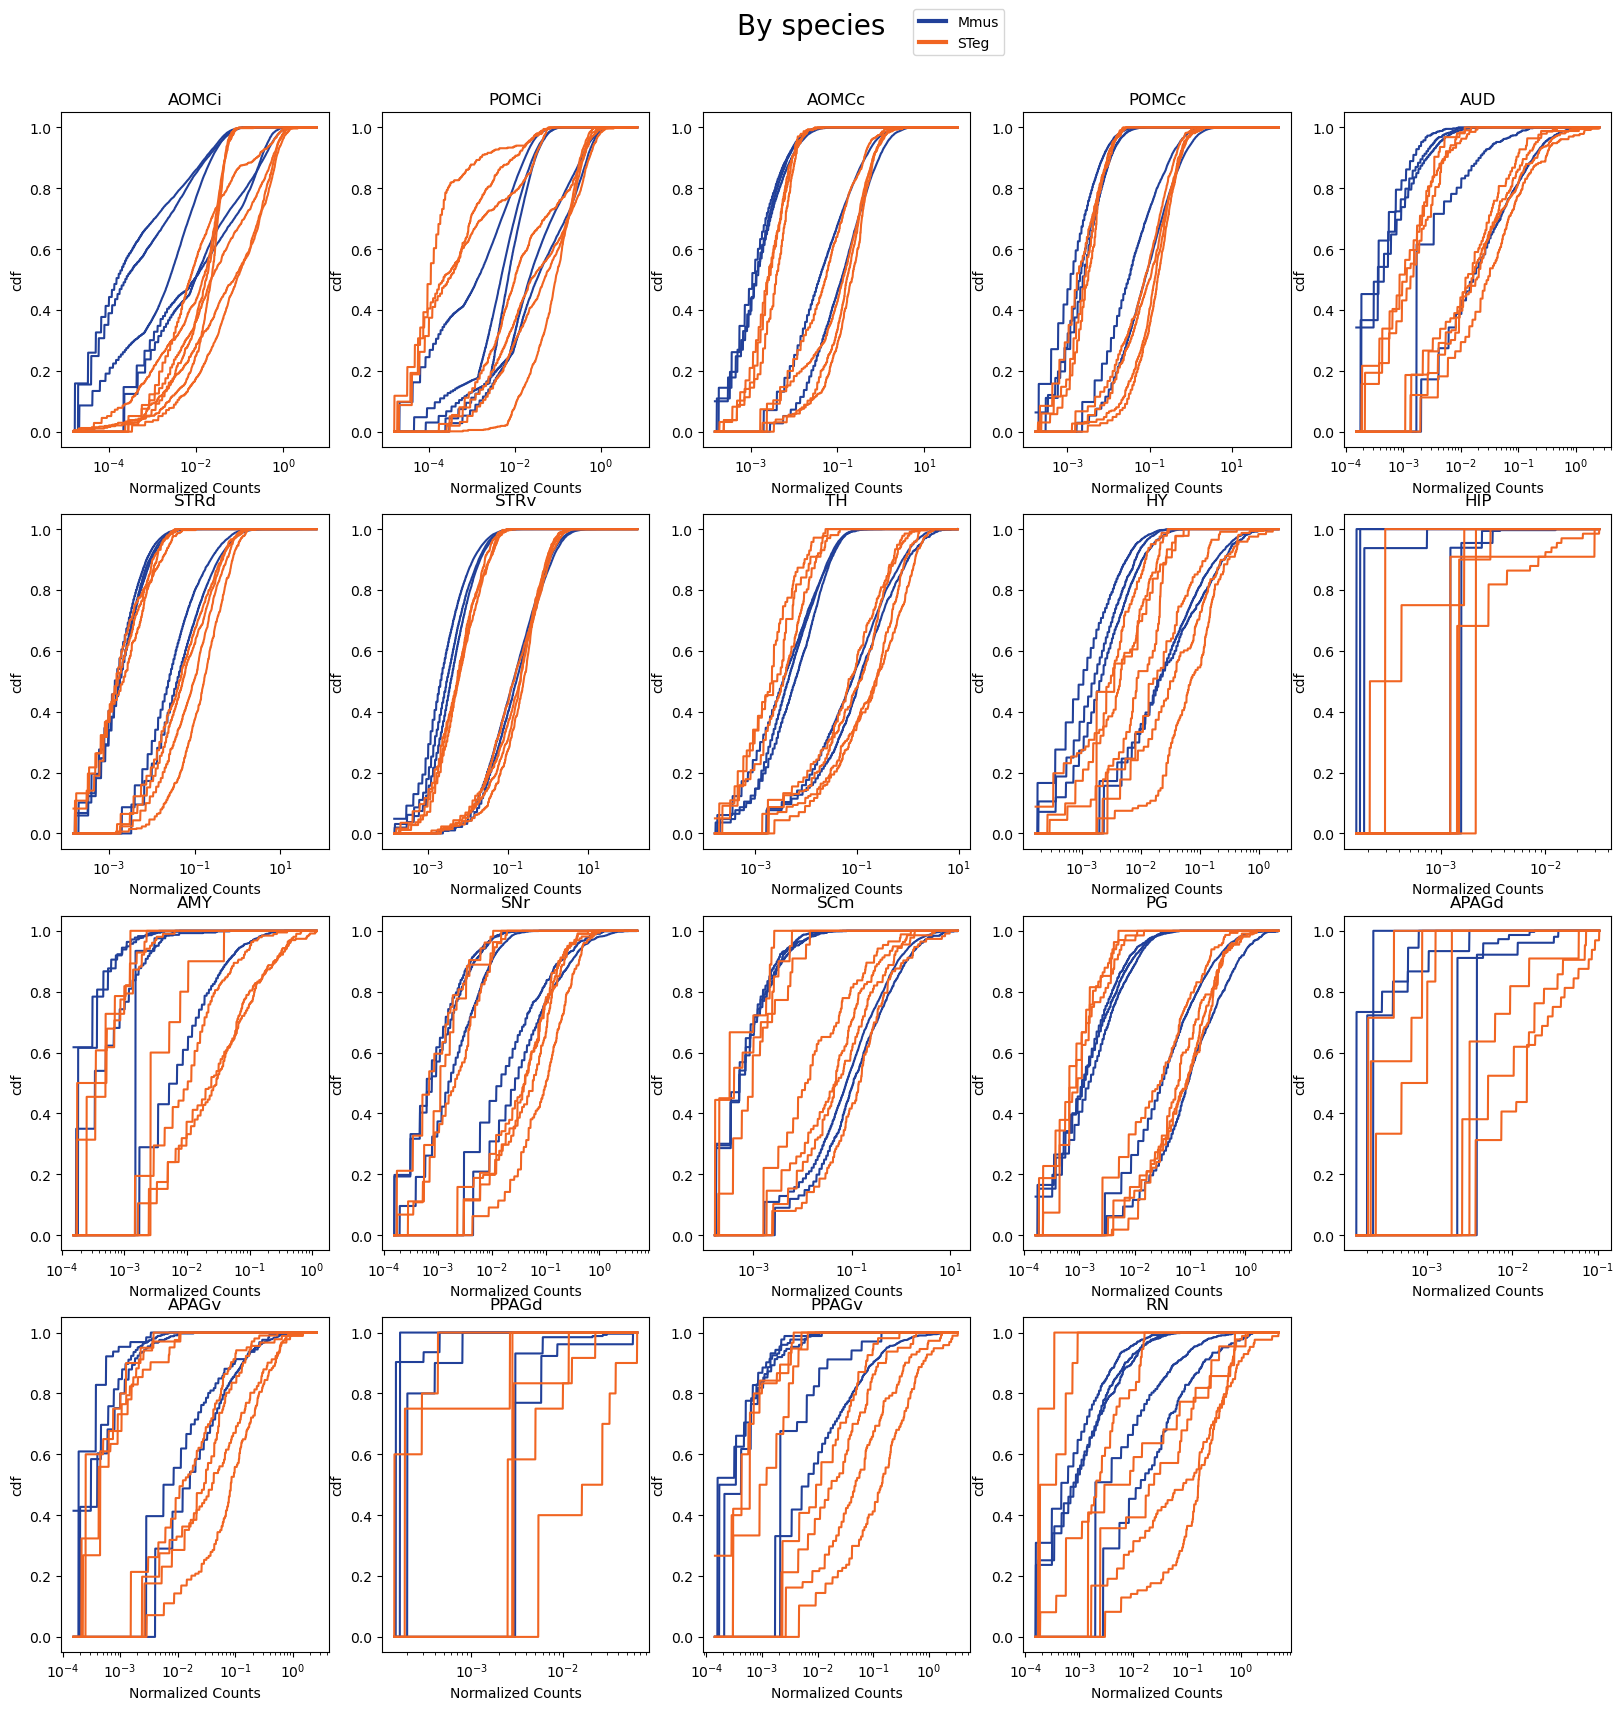

In [ ]:
fig, axs = plt.subplots(4,5, figsize=(20,20))

i=0
for ax in axs.flat:
    if i <19:
        area = plot_areas[i]

        plot = omc_countN_cdf[omc_countN_cdf['area']==area]
        
        plot_mm = plot[plot["species"] =="MMus"]
        plot_st = plot[plot["species"] =="STeg"]

        sns.lineplot(plot_mm, x="x", y="cdf", estimator=None, units="mice", color=blue_cmp.colors[255], ax=ax) # plots individual mice
        sns.lineplot(plot_st, x="x", y="cdf", estimator=None, units="mice", color=orange_cmp.colors[255], ax=ax) # plots individual mice
        ax.set_xscale("log")
        ax.set_xlabel("Normalized Counts")

        ax.set_title(area)
        i+=1
    else:
        ax.axis('off')

# create cutom legend
colors = [blue_cmp.colors[255], orange_cmp.colors[255]]
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['Mmus', "STeg"]
fig.legend(lines,labels, bbox_to_anchor=(0.6, 0.935))

plt.suptitle("By species", y=0.93, size=20)
plt.show()

# plot cdfs by dataset

TypeError: tuple indices must be integers or slices, not str

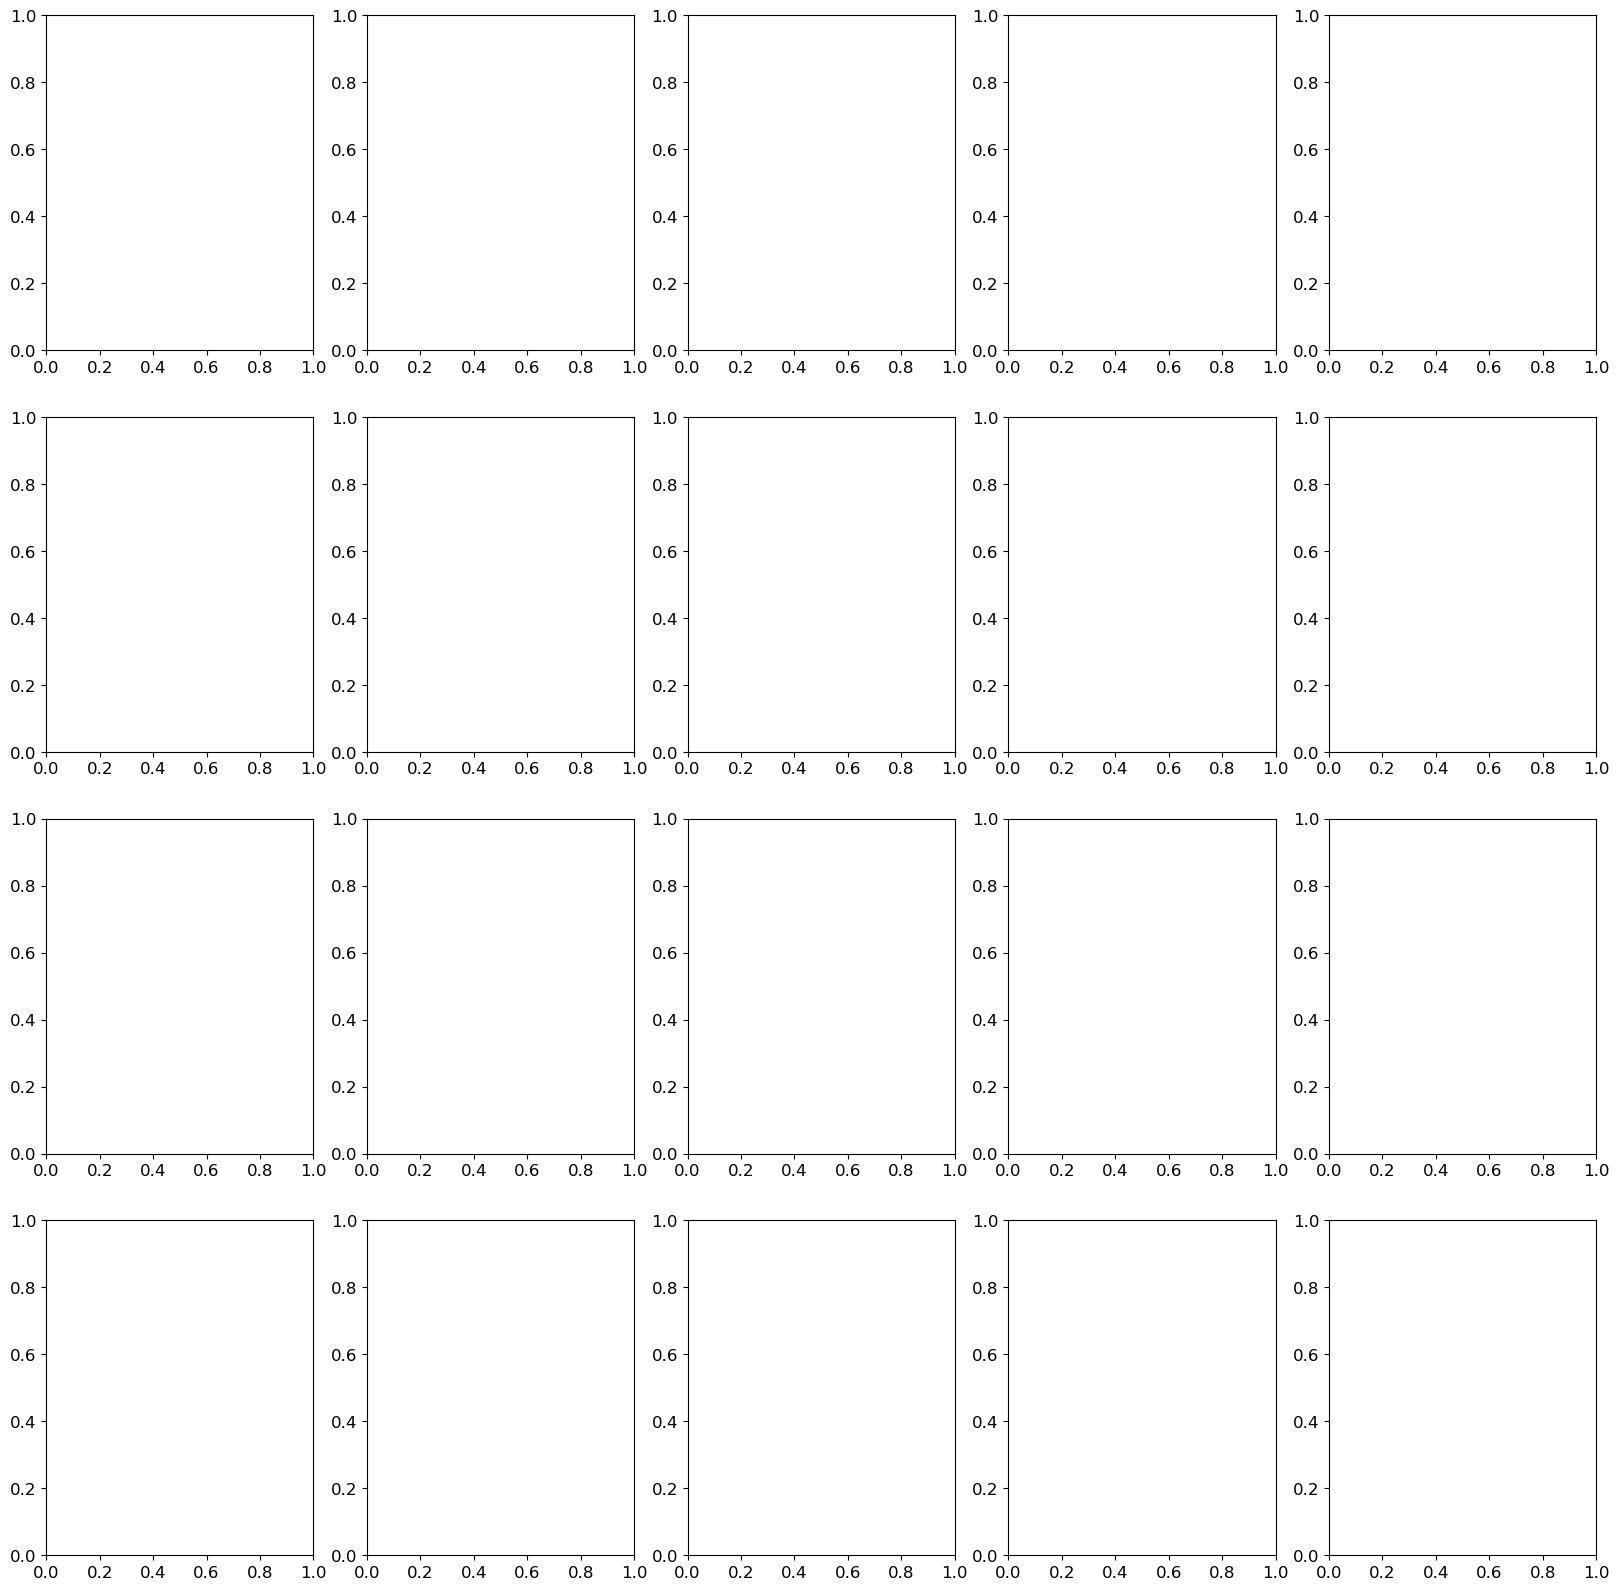

In [112]:
fig, axs = plt.subplots(4,5, figsize=(20,20))

i=0
for ax in axs.flat:
    if i <19:
        area = plot_areas[i]

        plot = omc_countN_cdf[omc_countN_cdf['area']==area]
        
        plot_194 = plot[plot["dataset"] =="M194"]
        plot_220 = plot[plot["dataset"] =="M220"]

        sns.lineplot(plot_194, x="x", y="cdf", estimator=None, units="mice", color="green", ax=ax) # plots individual mice
        sns.lineplot(plot_220, x="x", y="cdf", estimator=None, units="mice", color="purple", ax=ax) # plots individual mice
        ax.set_xscale("log")
        ax.set_xlabel("Normalized Counts")

        ax.set_title(area)
        i+=1
    else:
        ax.axis('off')

# create cutom legend
colors = ["green", "purple"]
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ['M194', "M220"]
fig.legend(lines,labels, bbox_to_anchor=(0.6, 0.935))

plt.suptitle("By Dataset", y=0.93, size=20)
plt.show()

## Apply Batch correction

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


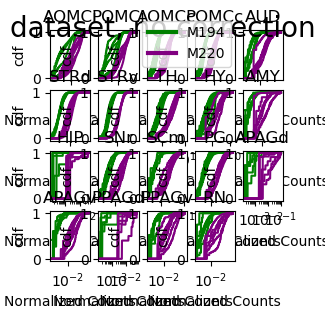

In [6]:
# Normalize by median source median BC/neuron
to_plot = ['AOMCi', 'POMCi','AOMCc', 'POMCc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']
fig1 = plot_cdf(omc_countN, plot_areas=to_plot, color_by="dataset", colors=["green", "purple"], title="dataset, no correction")
plt.show()

In [7]:
# normalize by median BC/neuron per brain (at source/injection region)

print("raw counts:")
display(omc_count[0].head())
print("\n")
print("counts normalized to spike-ins:")
display(omc_countN[0].head())


raw counts:


,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,AMY,HIP,SNr,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN
0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,88.0,0.0,13.0,23.0,0.0,0.0,70.0,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,125.0,0.0,1.0,2.0,0.0,0.0,2.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,56.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,268.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




counts normalized to spike-ins:


,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,L1_ctl,H2O_inj_ctl,H2O_targ_ctl
0,0.0,0.000000,0.001950,0.0,0.000000,0.000000,0.0,0.0,0.000159,0.001075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000138,0.003990,0.0,0.002357,0.006801,0.0,0.0,0.011118,0.020885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000020,0.005668,0.0,0.000181,0.000591,0.0,0.0,0.000318,0.003071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.002539,0.0,0.001813,0.001478,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.012152,0.0,0.000000,0.000000,0.0,0.0,0.005241,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# add injection site label to extract inj BC/neuron
for i in range(metadata.shape[0]):
    df = omc_countN[i]
    inj = df["AOMCi"] > df["POMCi"]
    inj = inj.replace({True:"AOMCi", False:"POMCi"})
    omc_countN[i]["inj_site"] = inj

omc_countN[0].drop(["inj_site"], axis=1)

,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,L1_ctl,H2O_inj_ctl,H2O_targ_ctl
0,0.0,0.000000,0.001950,0.0,0.000000,0.000000,0.0,0.0,0.000159,0.001075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000138,0.003990,0.0,0.002357,0.006801,0.0,0.0,0.011118,0.020885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000020,0.005668,0.0,0.000181,0.000591,0.0,0.0,0.000318,0.003071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.002539,0.0,0.001813,0.001478,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.012152,0.0,0.000000,0.000000,0.0,0.0,0.005241,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,0.0,0.000119,0.005940,0.0,0.000000,0.000296,0.0,0.0,0.000318,0.001536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11740,0.0,0.000000,0.005668,0.0,0.000000,0.000296,0.0,0.0,0.000794,0.002764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11741,0.0,0.005615,0.000091,0.0,0.000000,0.000887,0.0,0.0,0.000000,0.001229,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11742,0.0,0.000534,0.006711,0.0,0.000000,0.000296,0.0,0.0,0.001588,0.003532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# normalize by median BC/neuron per brain? (across all target regions)
targets = ['AOMCc', 'POMCc', 'ACAc', 'AUD', 'STRd',
       'STRv', 'TH', 'HY', 'AMY', 'HIP', 'SNr', 'SCm', 'PG', 'APAGd', 'APAGv',
       'PPAGd', 'PPAGv', 'RN']

medians = pd.DataFrame(columns=["AOMCi_med", "POMCi_med", "inj_med", "target_med", "all_med",
                                "mice", "species", "dataset"])


for i in range(metadata.shape[0]):
    df = omc_countN[i]

    # take nonzero median
    aomci_df = df[df['inj_site']=="AOMCi"]
    aomci = aomci_df["AOMCi"]
    aomci = aomci[aomci!=0]
    aomci_med = aomci.median()

    pomci_df = df[df['inj_site']=="POMCi"]
    pomci = pomci_df["POMCi"]
    pomci = pomci[pomci!=0]
    pomci_med = pomci.median()

    # combine AOMCi and POMCi countN for inj_med
    inj_bc = pd.concat([aomci, pomci])
    inj_med = inj_bc.median()

    # calculate median from just nonzero countN in target sites
    target_bcN = pd.Series(dtype="float64")
    
    for area in targets:
       area_bc = df[area]
       area_bc = area_bc[area_bc!=0]
       target_bcN = pd.concat([target_bcN, area_bc])

    # calculate median of nonzero countN across whole brain
    val_df = df.drop(["inj_site"], axis=1)
    vals = val_df.values.flatten()
    vals = vals[vals!=0]
    all_med = np.median(vals)
    
    target_med = target_bcN.median()

    row = [aomci_med, pomci_med, inj_med, target_med, all_med, 
           metadata.loc[i,"mice"], metadata.loc[i,"species"], metadata.loc[i,"dataset"]]

    medians.loc[i,:] = row

medians

,AOMCi_med,POMCi_med,inj_med,target_med,all_med,mice,species,dataset
0,0.007197,0.006575,0.006733,0.001943,0.002065,MMM1,MMus,M194
1,0.00629,0.005647,0.005953,0.001554,0.001568,MMF2,MMus,M194
2,0.011171,0.008818,0.009122,0.001858,0.00213,MMF3,MMus,M194
3,0.022893,0.023409,0.022905,0.002171,0.002253,STM1,STeg,M194
4,0.023799,0.017385,0.023192,0.002824,0.002676,STM2,STeg,M194
5,0.021982,0.013172,0.019628,0.00232,0.002359,STF3,STeg,M194
6,0.124483,0.116321,0.119496,0.052,0.042,MMM4,MMus,M220
7,0.083029,0.050412,0.058168,0.052189,0.037809,MMF5,MMus,M220
8,0.35396,0.213559,0.270012,0.05547,0.055879,STF4,STeg,M220
9,0.222513,0.225242,0.224694,0.108247,0.075486,STM5,STeg,M220


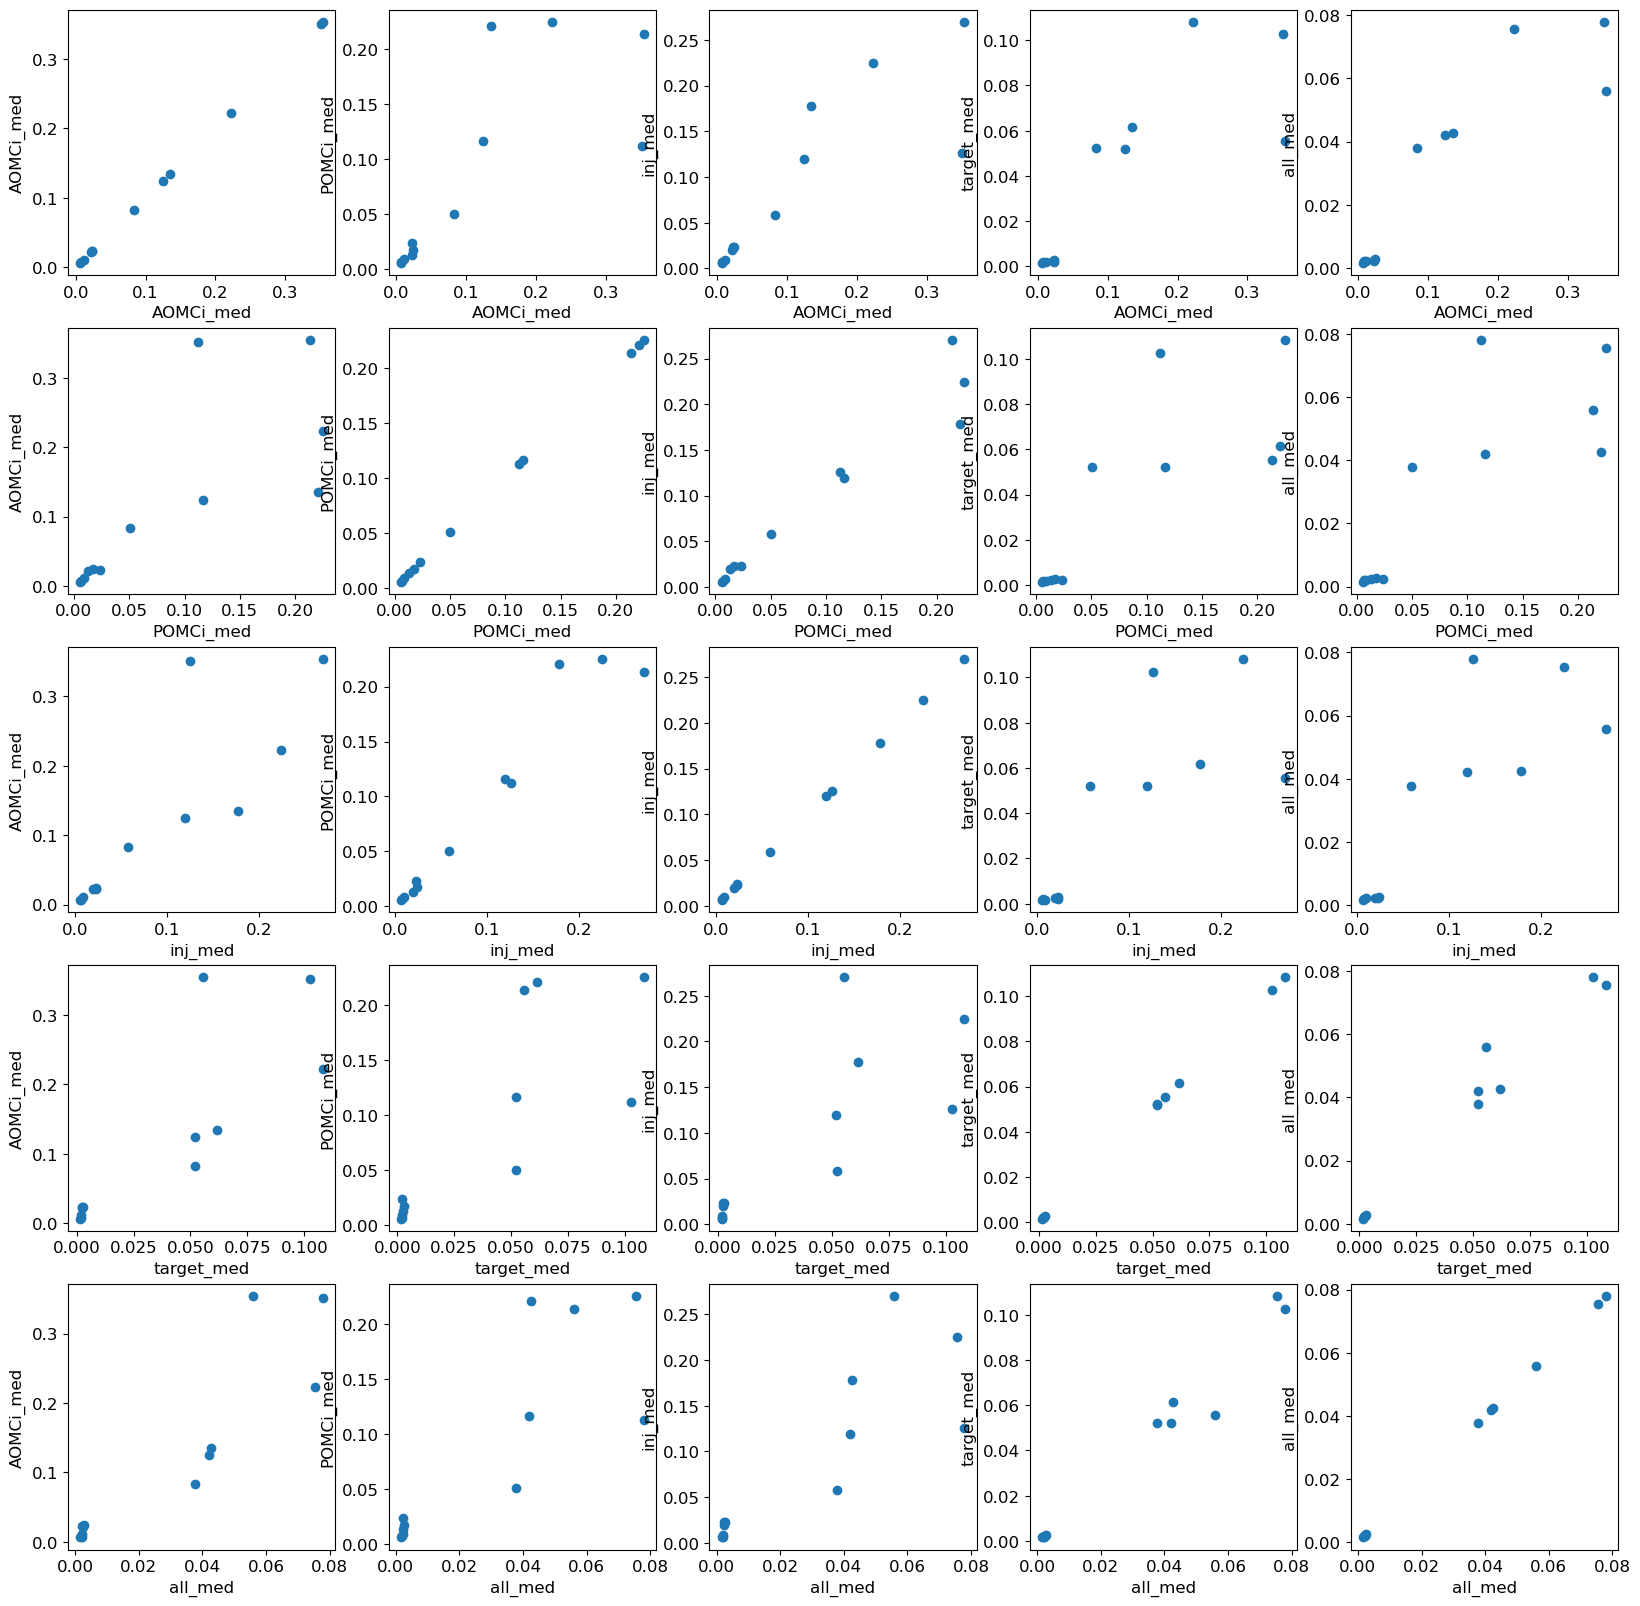

In [10]:
# compare correlation across different medians
fig, axs = plt.subplots(5,5, figsize=(20,20))

for i in range(5):
    for j in range(5):
        axs[i,j].scatter(medians.iloc[:,i], medians.iloc[:,j])
        axs[i,j].set_xlabel(medians.columns[i])
        axs[i,j].set_ylabel(medians.columns[j])


In [11]:
test = omc_countN[0].copy()
test.drop(["inj_site"],axis=1)/2

,OB,AOMCi,POMCi,ACAi,AOMCc,POMCc,ACAc,AUD,STRd,STRv,...,SCm,PG,APAGd,APAGv,PPAGd,PPAGv,RN,L1_ctl,H2O_inj_ctl,H2O_targ_ctl
0,0.0,0.000000,0.000975,0.0,0.000000,0.000000,0.0,0.0,0.000079,0.000537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000069,0.001995,0.0,0.001178,0.003400,0.0,0.0,0.005559,0.010442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000010,0.002834,0.0,0.000091,0.000296,0.0,0.0,0.000159,0.001536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.001270,0.0,0.000906,0.000739,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.006076,0.0,0.000000,0.000000,0.0,0.0,0.002621,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11739,0.0,0.000059,0.002970,0.0,0.000000,0.000148,0.0,0.0,0.000159,0.000768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11740,0.0,0.000000,0.002834,0.0,0.000000,0.000148,0.0,0.0,0.000397,0.001382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11741,0.0,0.002808,0.000045,0.0,0.000000,0.000444,0.0,0.0,0.000000,0.000614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11742,0.0,0.000267,0.003355,0.0,0.000000,0.000148,0.0,0.0,0.000794,0.001766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
omc_countN_med[0]

NameError: name 'omc_countN_med' is not defined

NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


TypeError: tuple indices must be integers or slices, not str

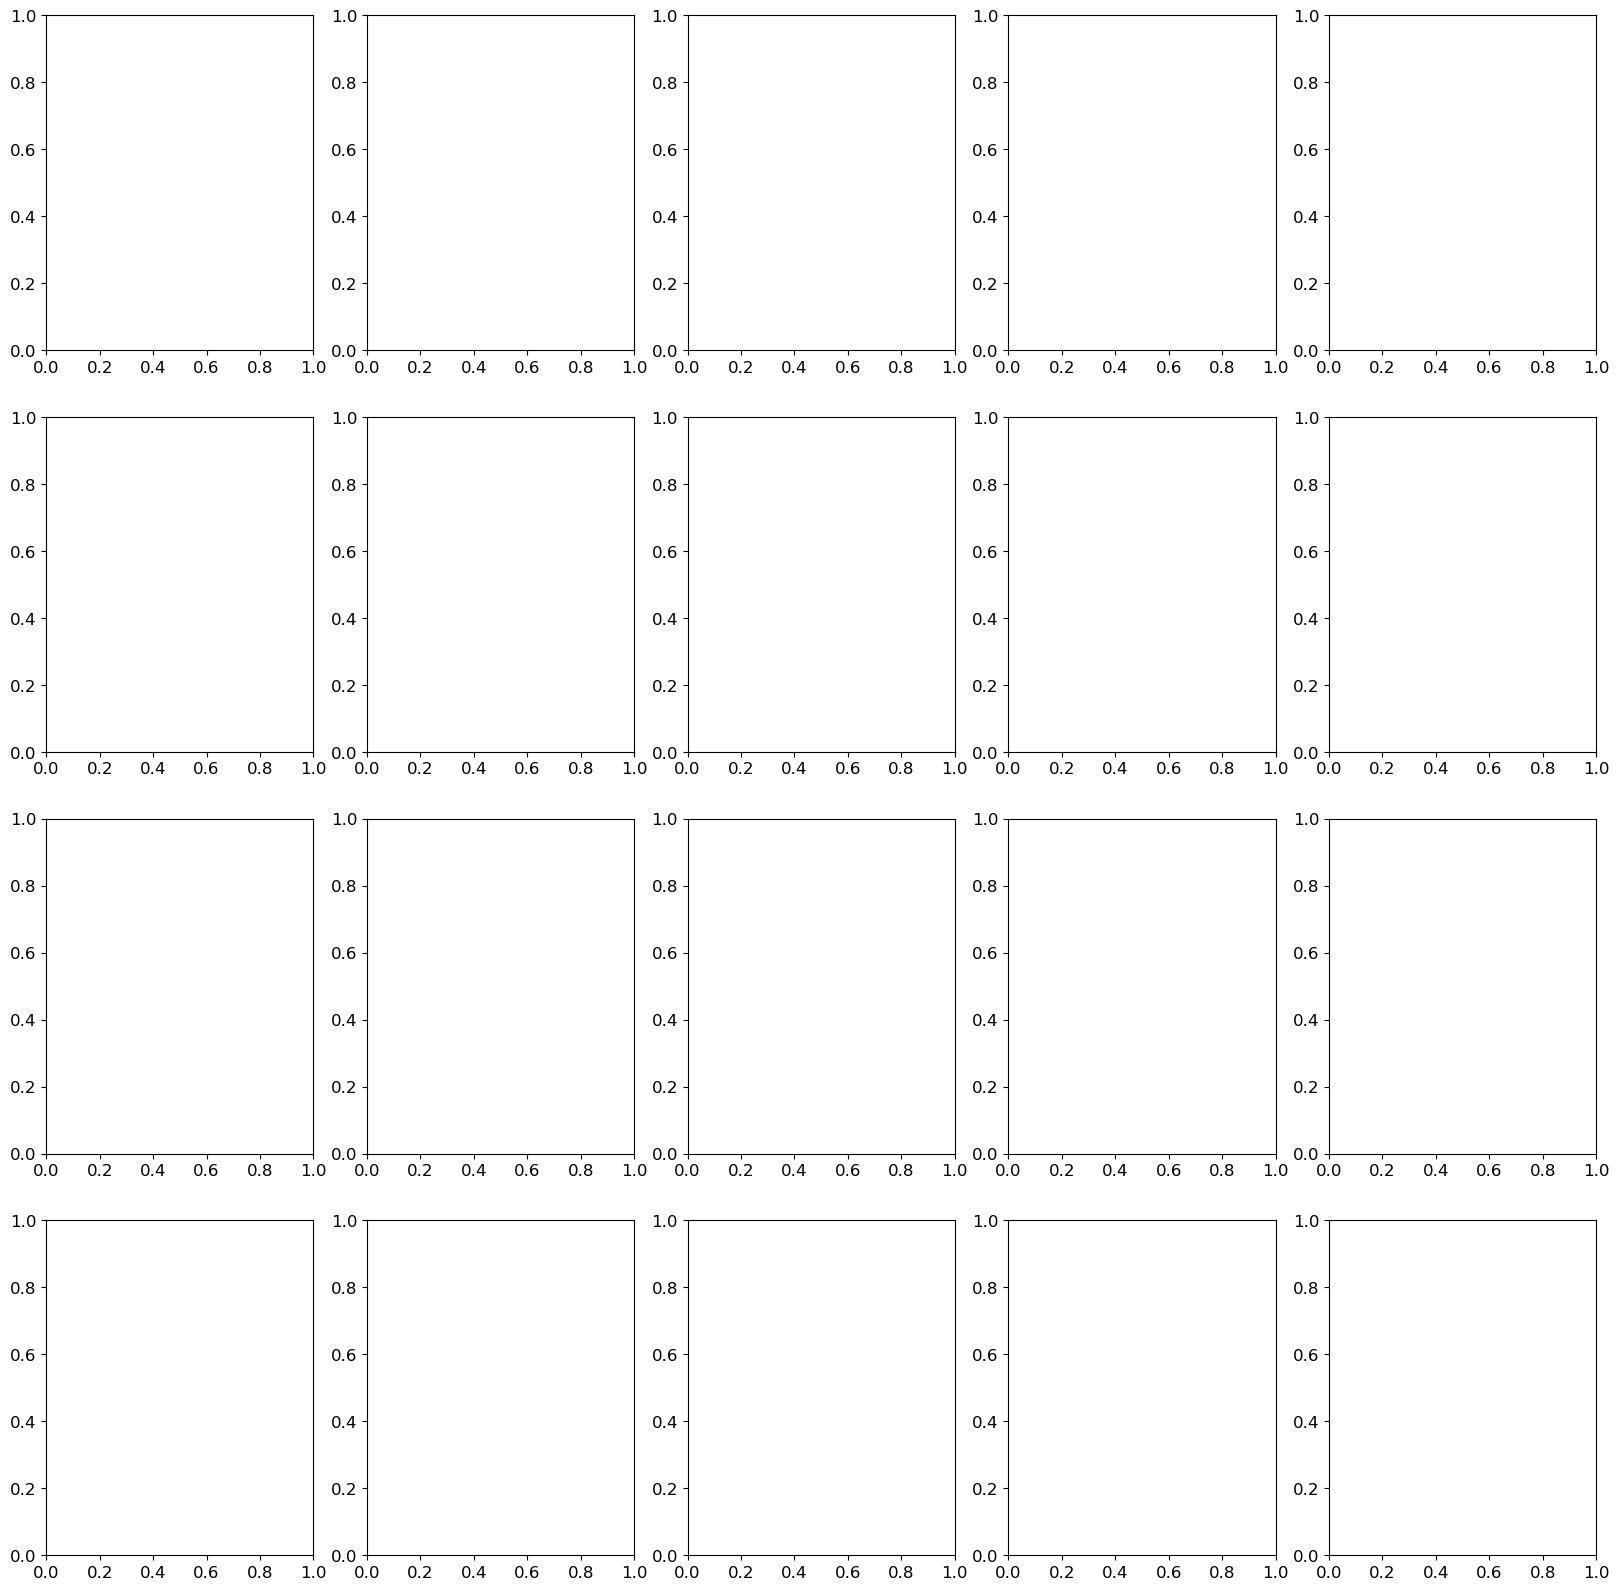

In [ ]:
# normalize by inj_site median
omc_countN_med = []
for i in range(len(omc_countN)):
    df = omc_countN[i].copy()
    df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "inj_med"]
    omc_countN_med.append(df_m)



plot_cdf(omc_countN_med, plot_areas=to_plot, color_by="dataset", 
         colors=["green", "purple"], title="by dataset, inj_med normed")
plt.show()

plot_cdf(omc_countN_med, plot_areas=to_plot, color_by="species",
         title="by species, inj_med normed")
plt.show()


NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


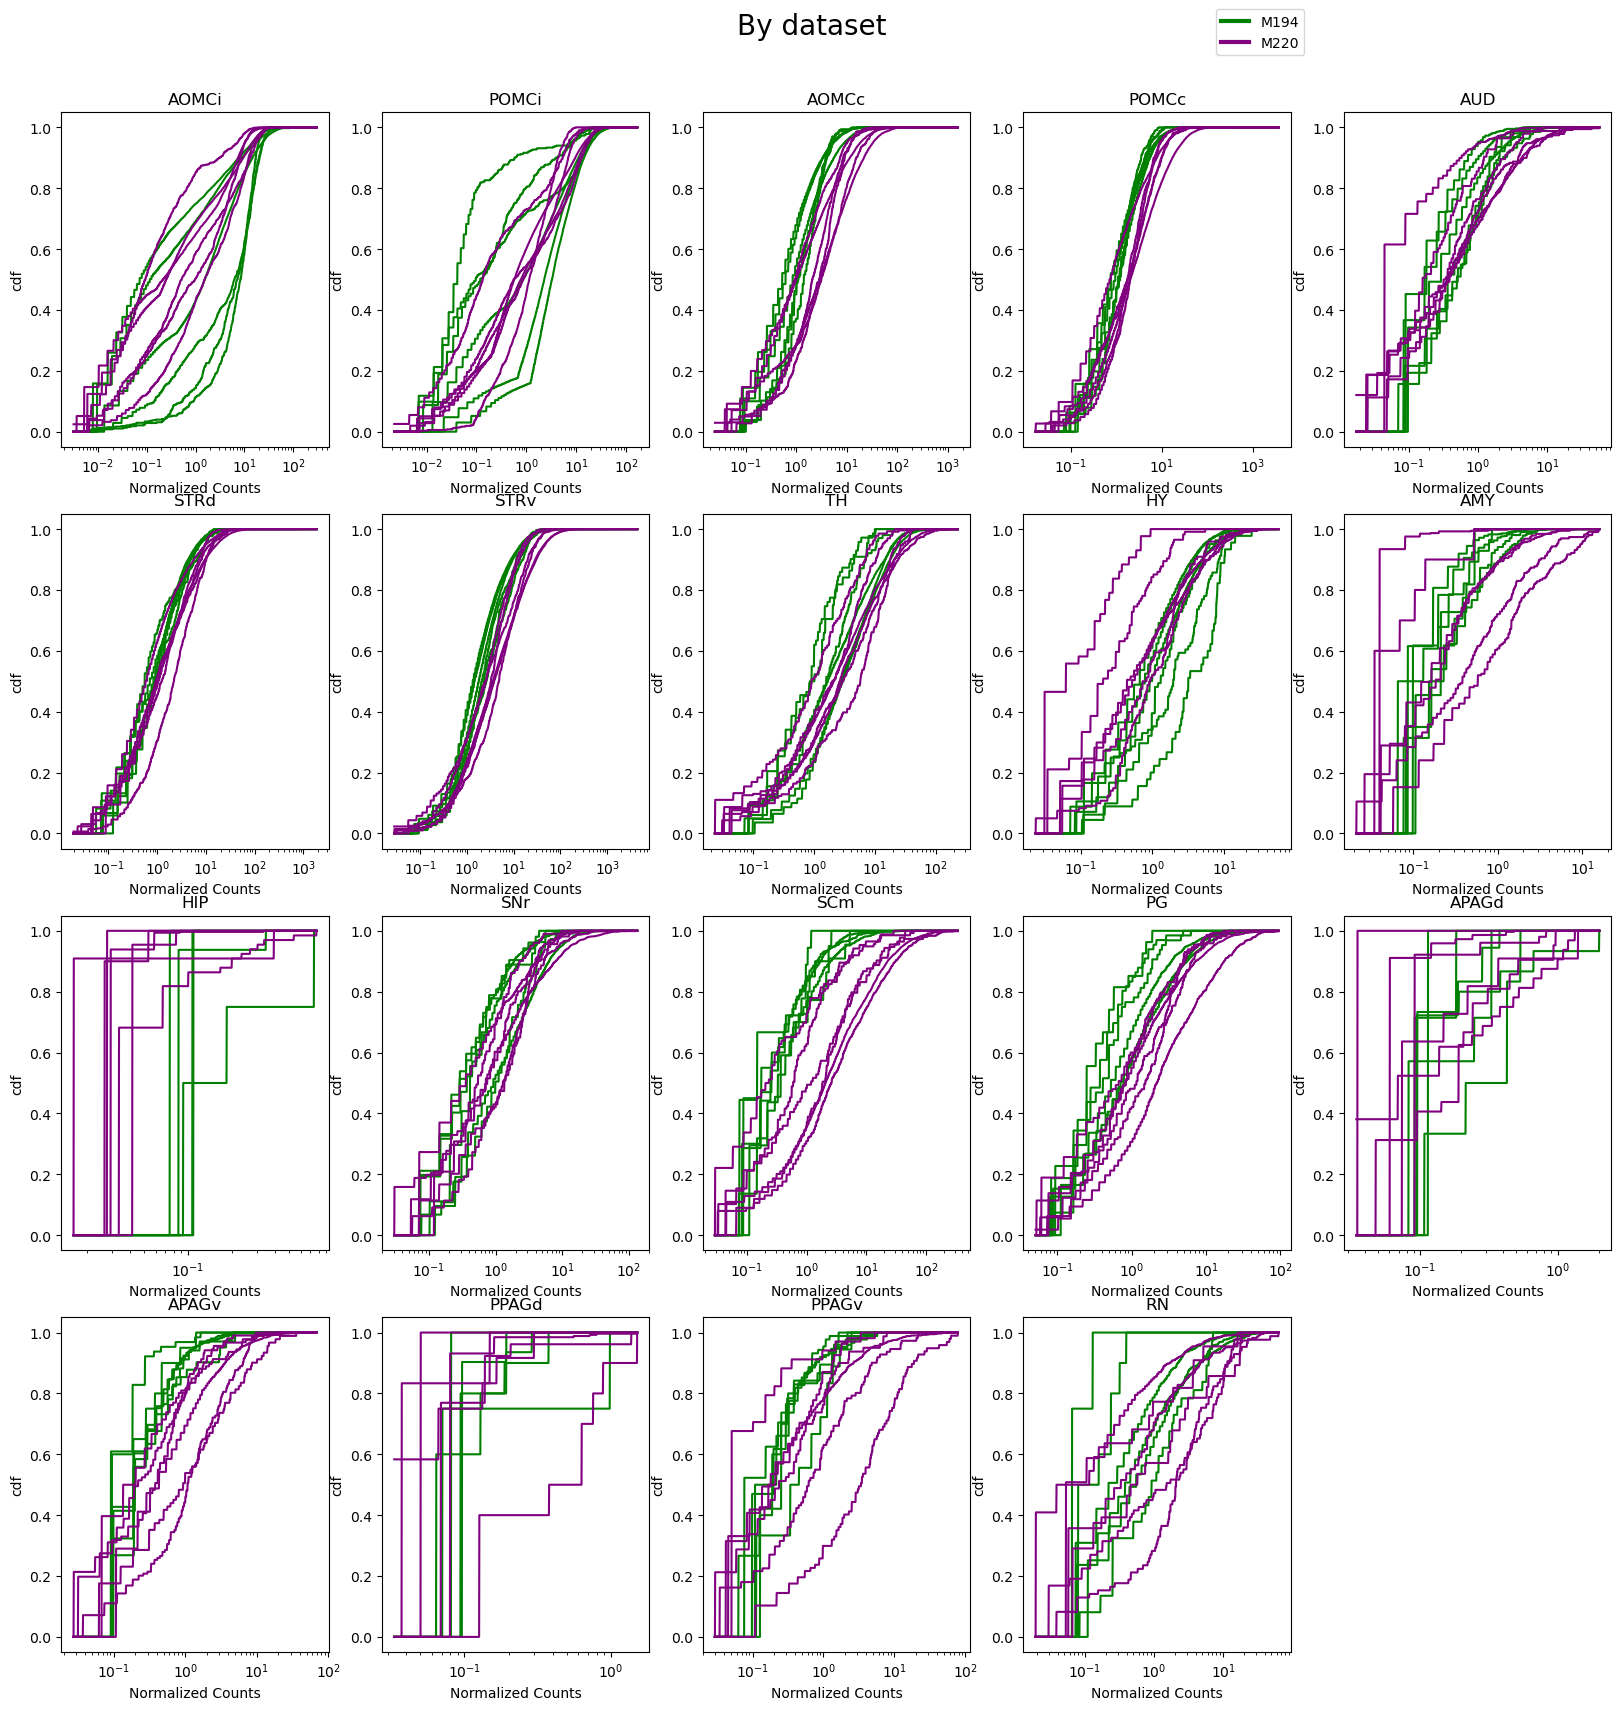

NO BARCODES, cannot compute ECDF for HIP STF3
NO BARCODES, cannot compute ECDF for PPAGd STF3


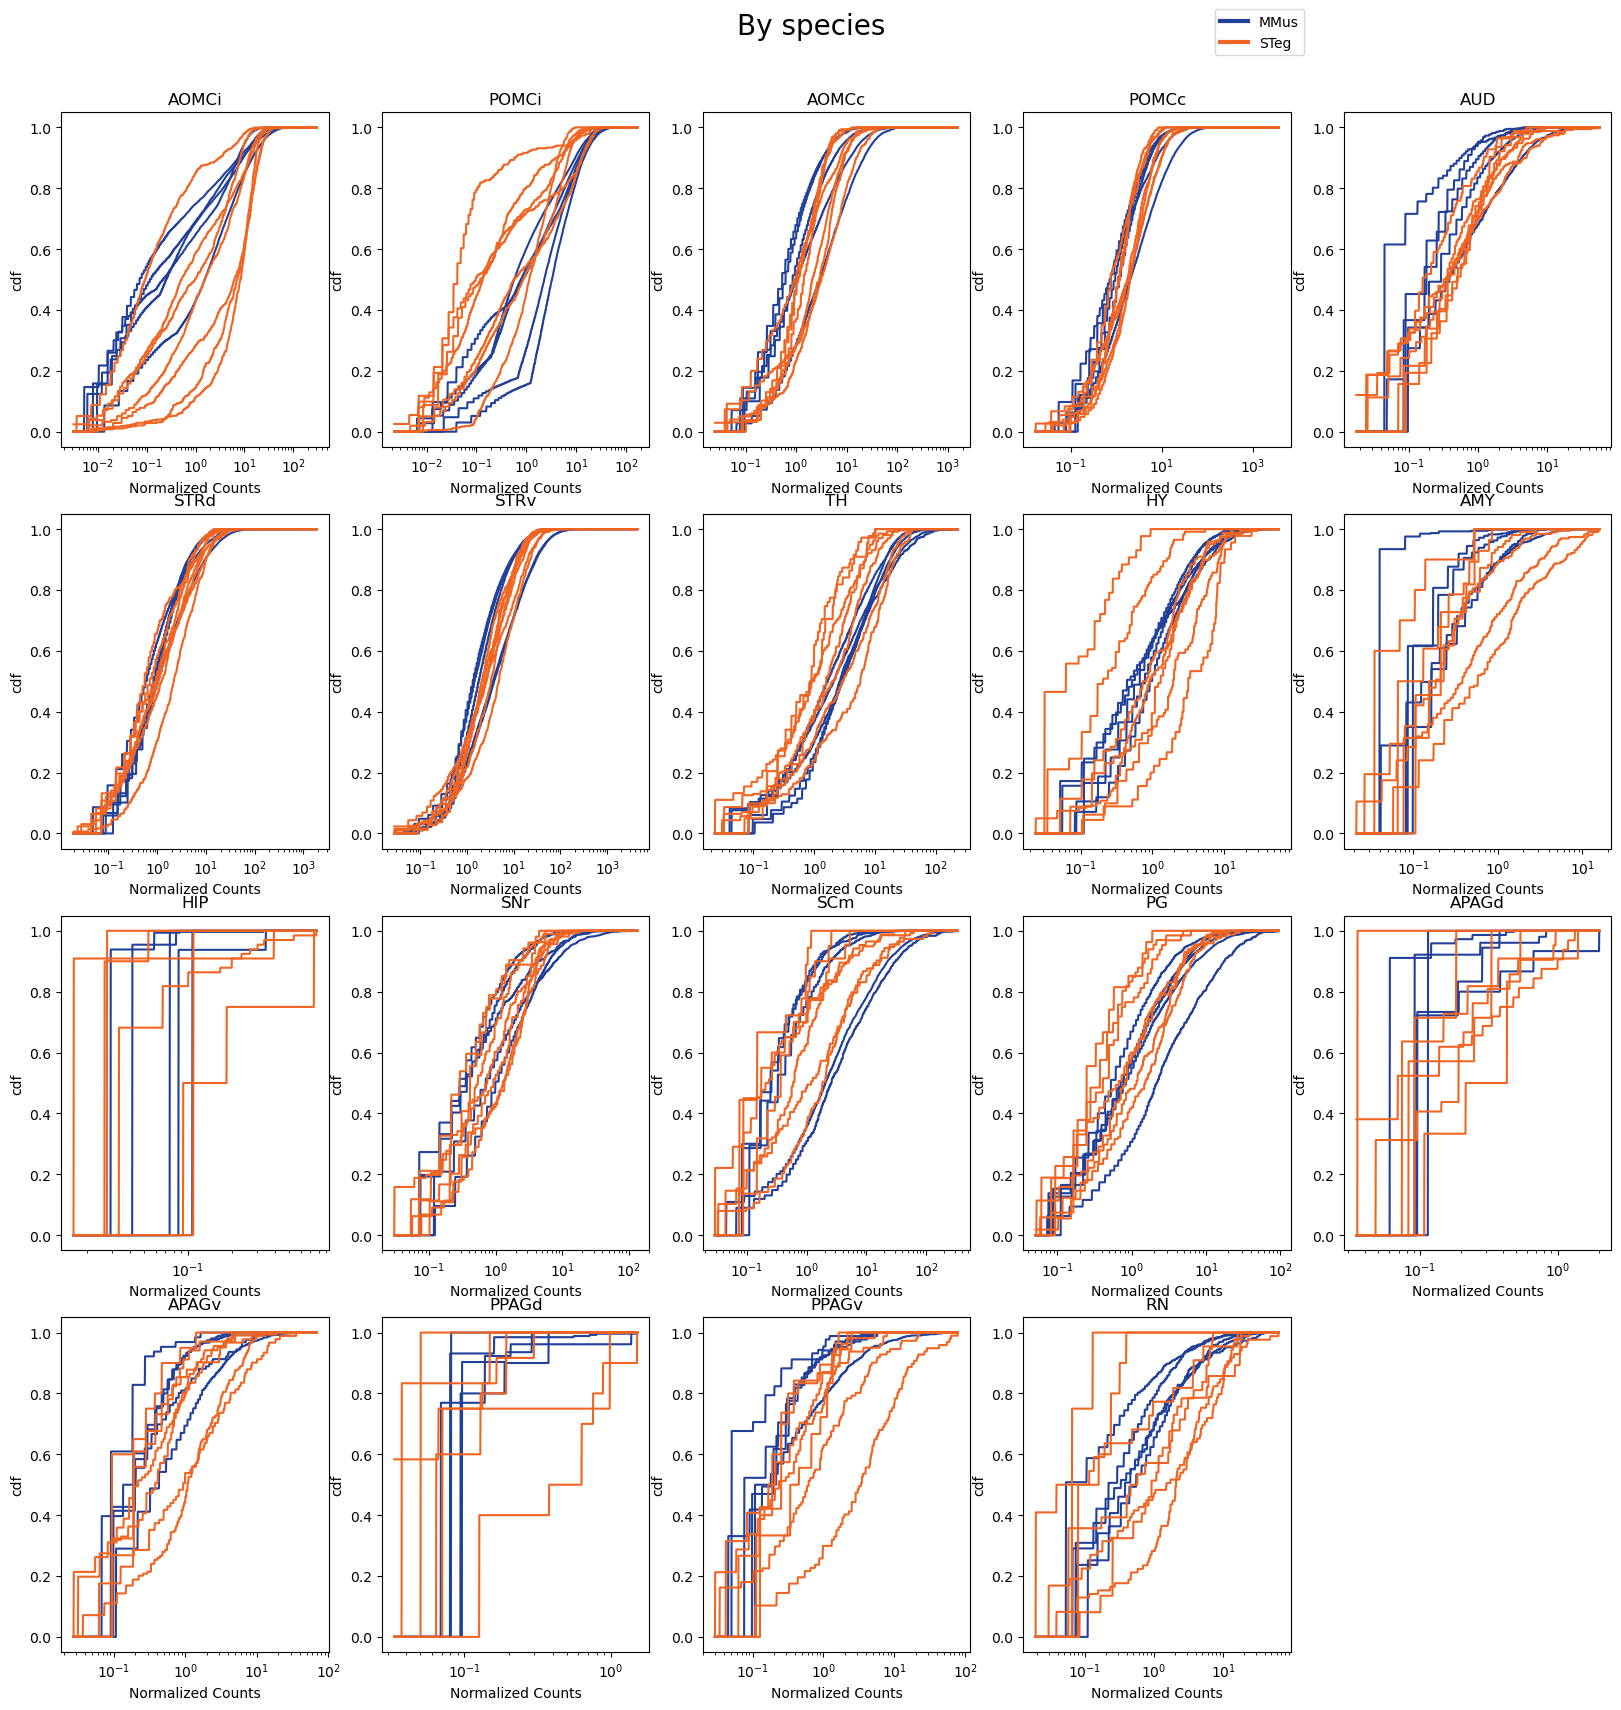

In [ ]:


# normalize by all barcodes median
omc_countN_med = []
for i in range(len(omc_countN)):
    df = omc_countN[i].copy()
    df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "all_med"]
    omc_countN_med.append(df_m)

fig3 = plot_cdf(omc_countN_med, plot_areas=to_plot, color_by="dataset", colors=["green", "purple"])
plt.show()

fig4 = plot_cdf(omc_countN_med, plot_areas=to_plot, color_by="species")
plt.show()



# figs for poster

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


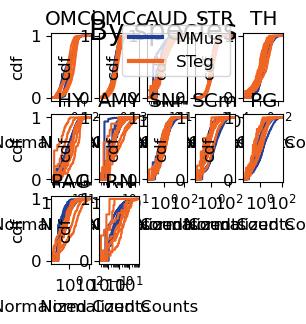

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


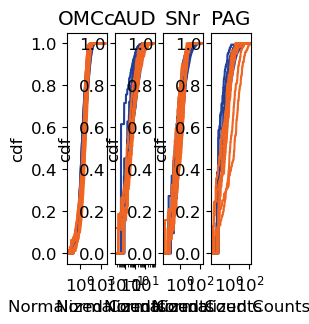

In [13]:
to_plot = ['OMCi', 'OMCc', 'AUD', 'STR', 'TH', 'HY', 'AMY', 'SNr', 
           'SCm', 'PG', 'PAG', 'RN']

# combine areas
omc_countN_comb = df_combine_areas(omc_countN)


# normalize by all barcodes median
omc_countN_med = []
for i in range(len(omc_countN_comb)):
    df = omc_countN_comb[i].copy()
    # df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "all_med"]
    omc_countN_med.append(df_m)

fig4 = plot_cdf(omc_countN_med, plot_areas=to_plot, color_by="species")
plt.show()

# plot OMCc, AUD, PAG, SNr
plot_cdf(omc_countN_med, plot_areas=["OMCc", "AUD", "SNr", "PAG"], color_by="species", title=None, legend=False)
plt.show()

In [14]:
omc_countN_rename = [df.rename(columns={"AUD":"AUD/TEa"}) for df in omc_countN_med]
omc_countN_rename[0]

,OMCi,OMCc,AUD/TEa,STR,TH,HY,AMY,PAG,SNr,SCm,PG,RN
0,0.944284,0.000000,0.0,0.597524,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.999520,4.435043,0.0,15.499149,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.754587,0.374204,0.0,1.641278,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.229765,1.594013,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.885303,0.000000,0.0,2.538462,6.135408,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11739,2.934227,0.143202,0.0,0.897562,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11740,2.745010,0.143202,0.0,1.723304,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11741,2.763513,0.429605,0.0,0.594973,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11742,3.508645,0.143202,0.0,2.479777,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])


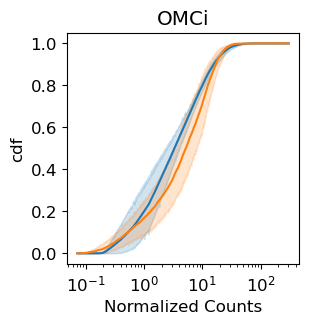

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:565: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel('$log_{2}$($\dfrac{STeg}{MMus}$)')
/Users/eisko/github_repos/MAPseq_analysis/MAPse

KeyboardInterrupt: 

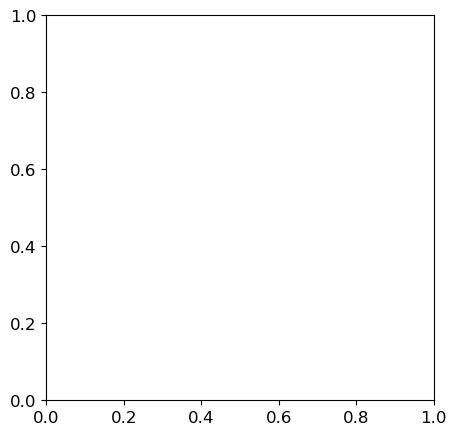

In [15]:
plot_ind = [["OMCi"], ["OMCc"], ["AUD/TEa"], ["SNr"], ["PAG"]]
labels = ["OMCi", "OMCc", "AUD_TEa", "SNr", "PAG"]

# plot OMCc, AUD, PAG, SNr seperately
for i in range(len(plot_ind)):
    area = plot_ind[i]
    plot_cdf(omc_countN_rename, plot_areas=area, color_by="species", title=None, legend=False, individual=False)
    plt.savefig(out_path+"cdf_comb_all_med_"+labels[i]+"_mean_ci95.jpg", dpi=300, bbox_inches="tight")
    plt.show()

# plot_cdf(omc_countN_med, plot_areas=["OMCi"], color_by="species", title=None, legend=False, individual=False)


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:681: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_bc = pd.concat([all_bc, df])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:711: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cdf_df = pd.concat([cdf_df, int])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:422: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the s

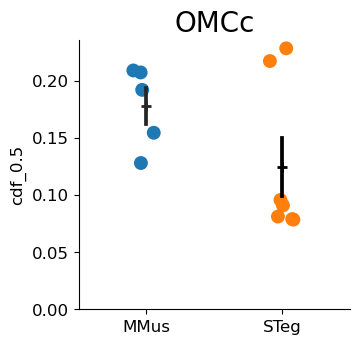

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:422: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


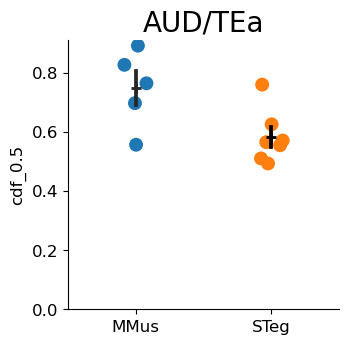

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:422: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


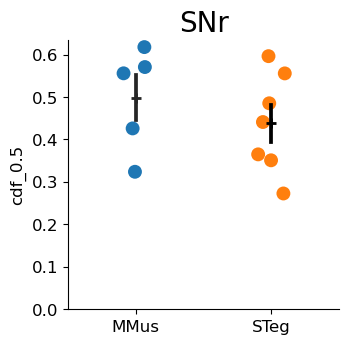

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:422: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=df, x="species", y=to_plot, hue="species", units='mice',


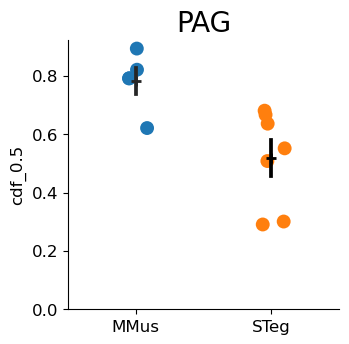

In [16]:
areas = ["OMCc", "AUD/TEa", "SNr", "PAG"]

cdf5_df = calc_cdf(omc_countN_rename, plot_areas=areas, cdf_val=0.5)

for area in areas:
    dot_plot(cdf5_df, area=area, title=area, to_plot="cdf_0.5")
    # plt.savefig(out_path+"cdf5_"+area+"dotplot.jpeg", dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
plot_ind = [["OMCc"], ["AUD"], ["SNr"], ["PAG"]]
plot_areas = ["OMCc", "AUD", "SNr", "PAG"]

# plot OMCc, AUD, PAG, SNr seperately
for i in range(len(plot_areas)):
    area = plot_areas[i]
    plot_cdf(omc_countN_med, plot_areas=area, color_by="species", title=None, legend=False)
    # plt.savefig(out_path+"cdf_comb_all_med_"+area[0]+".jpg", dpi=300, bbox_inches="tight")
    plt.show()

KeyError: 'O'

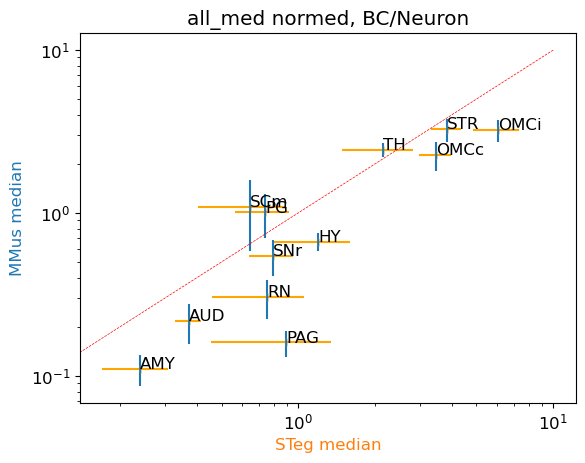

In [ ]:
# scatter and volcano
# normalize by all BC median


# to_drop = ['OB', 'AOMCi', 'POMCi', 'ACAi', 'ACAc', 'HIP', 'L1_ctl', 'H2O_inj_ctl', 'H2O_targ_ctl']
plot_med = dfs_to_medians(omc_countN_med, drop=[])
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="all_med normed, BC/Neuron", line_up_limit=10)
plt.savefig(out_path+"scatter_comb_all_med.jpg", dpi=200, bbox_inches="tight")
plt.show()


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:762: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, df_add])


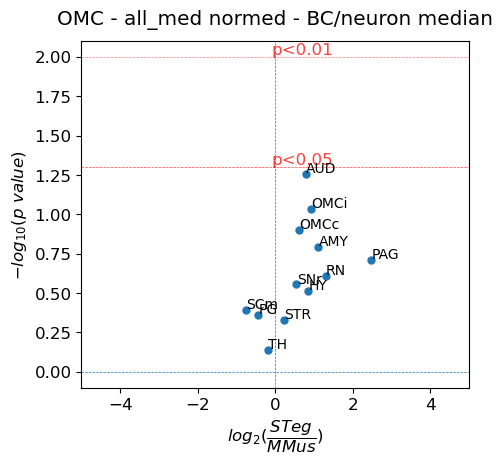

In [19]:

# volcano
plot_med = dfs_to_medians(omc_countN_med, drop=[])
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="OMC - all_med normed - BC/neuron median", xlim=(-5,5), legend_loc=None,
             fig_size=(5,4.5))

plt.savefig(out_path+"volcano_comb_all_med.jpg", dpi=200, bbox_inches="tight")
plt.show()

# scatter and volcano
- can only compare 2 samples at a time w/ KS
- decided to look at median per area so can compare across groups

## NO NORMALIZATION

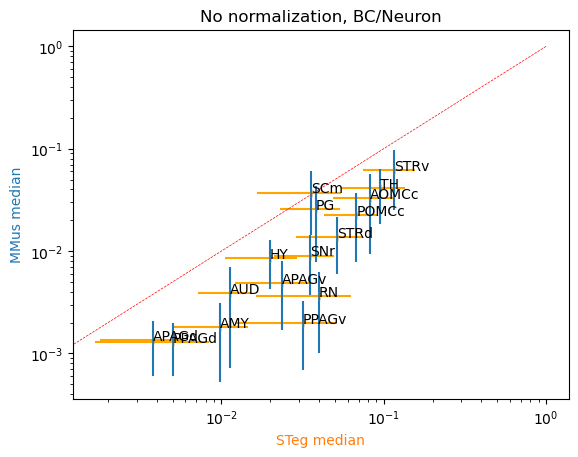

posx and posy should be finite values
posx and posy should be finite values


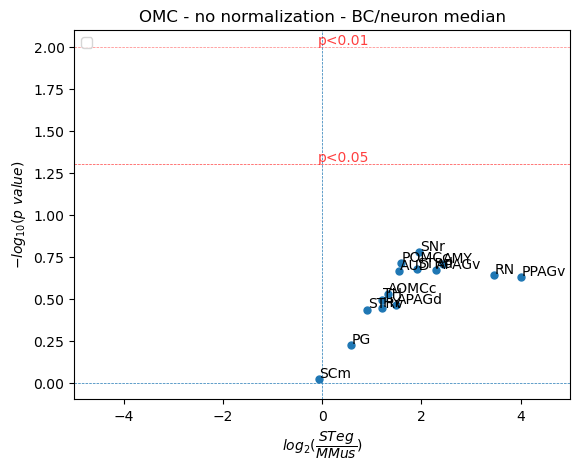

In [84]:
plot_med = dfs_to_medians(omc_countN)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="No normalization, BC/Neuron")
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="OMC - no normalization - BC/neuron median", xlim=(-5,5))
plt.show()

## Median Normalized

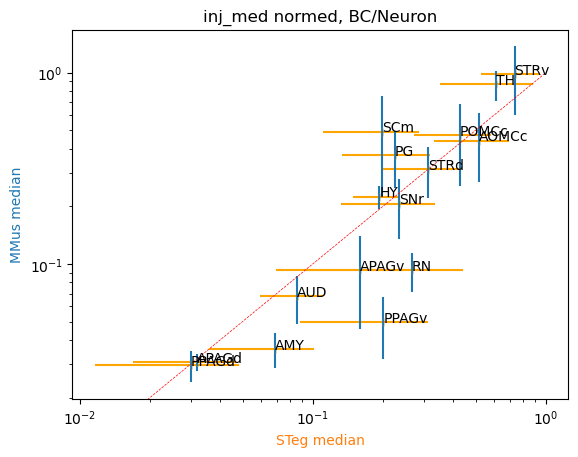

posx and posy should be finite values
posx and posy should be finite values


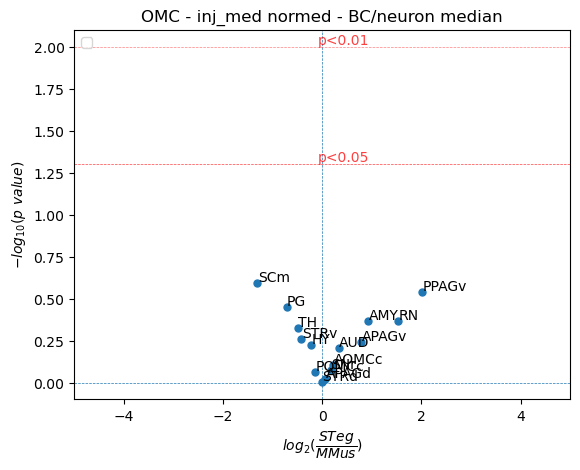

In [104]:
# normalize by inj_site median
omc_countN_med = []
for i in range(len(omc_countN)):
    df = omc_countN[i].copy()
    df = df.drop(["inj_site"], axis=1)
    df_m = df/medians.loc[i, "inj_med"]
    omc_countN_med.append(df_m)

to_drop = ['OB', 'AOMCi', 'POMCi', 'ACAi', 'ACAc', 'HIP', 'L1_ctl', 'H2O_inj_ctl', 'H2O_targ_ctl']
plot_med = dfs_to_medians(omc_countN_med, drop=to_drop)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="inj_med normed, BC/Neuron")
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="OMC - inj_med normed - BC/neuron median", xlim=(-5,5))
plt.show()

## w/in dataset

In [90]:
m194 = []
m220 = []
for i in range(metadata.shape[0]):
    if metadata.loc[i,"dataset"]=="M194":
        m194.append(omc_countN[i])
    elif metadata.loc[i,"dataset"]=="M220":
        m220.append(omc_countN[i])

6

### M194

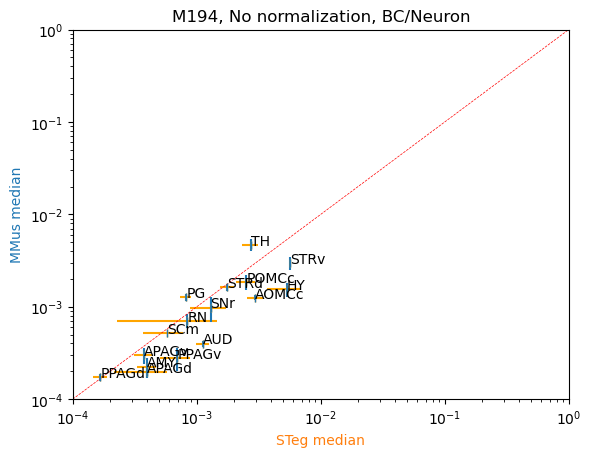

posx and posy should be finite values
posx and posy should be finite values


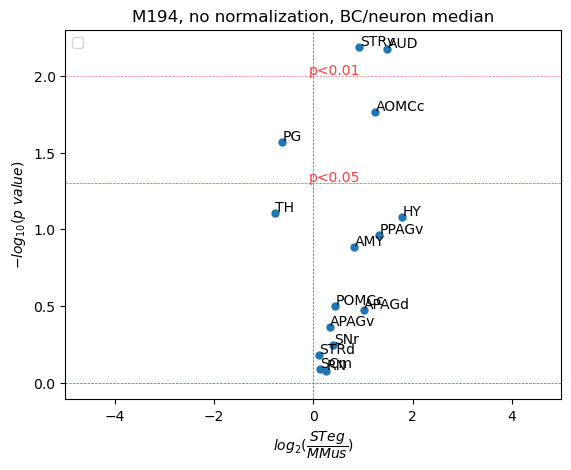

In [99]:
plot_med = dfs_to_medians(m194)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="M194, No normalization, BC/Neuron", 
                   ax_limits=(0.0001, 1))
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="M194, no normalization, BC/neuron median", xlim=(-5,5))
plt.show()

### M220

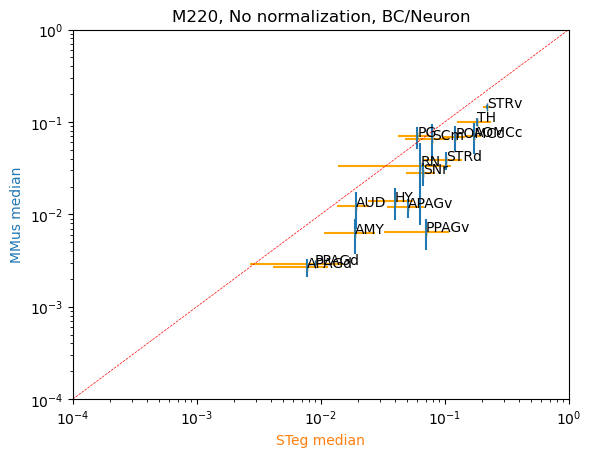

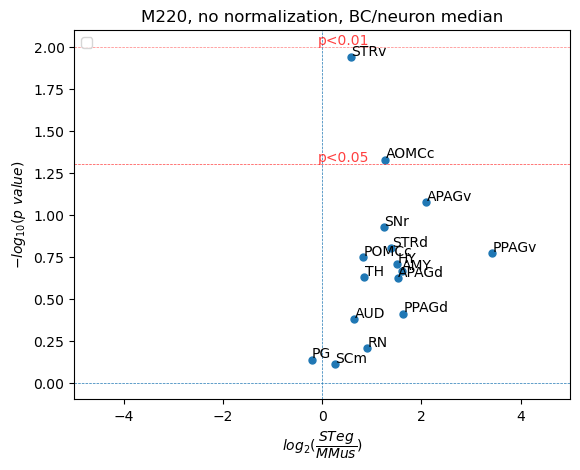

In [100]:
plot_med = dfs_to_medians(m220)
stvmm_area_scatter(plot_med, to_plot="median", log=True, title="M220, No normalization, BC/Neuron",
                   ax_limits=(0.0001, 1))
plt.show()

# volcano
plot = proportion_ttest(plot_med, to_plot="median")
plot_volcano(plot, title="M220, no normalization, BC/neuron median", xlim=(-5,5))
plt.show()